In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Regression on Airbnb Price

In [9]:
# airbnb_data = pd.read_csv("large_clean_data/airbnb_model_data_clean.csv", index_col=0)

In [28]:
airbnb_data = pd.read_csv('cleaned_data/current_listing_availability.csv', index_col=0)

In [29]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6144 entries, 0 to 6143
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   last_scraped                      6144 non-null   object 
 1   id                                6144 non-null   int64  
 2   host_id                           6144 non-null   int64  
 3   host_is_superhost                 6144 non-null   int64  
 4   host_listings_count               6144 non-null   float64
 5   zipcode                           6144 non-null   float64
 6   latitude                          6144 non-null   float64
 7   longitude                         6144 non-null   float64
 8   accommodates                      6144 non-null   int64  
 9   bathrooms                         6144 non-null   float64
 10  beds                              6144 non-null   float64
 11  price                             6144 non-null   float64
 12  minimu

## Prepare Data for Modeling

In [30]:
# Create summary function to quickly show statsmodel summary output.

def linreg_summary(X_train, y_train):
    X_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_int).fit()
    return model.summary()

In [73]:
# set up variables and drop non numerical columns
y = airbnb_data['monthly_income']
X = airbnb_data.drop(['last_scraped', 'id','host_id','monthly_income','occ_rate'], axis=1)

In [74]:
# perform train-test split using a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train

,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,multi_listing_host,available
5318,1,2.0,37203.0,36.15954,-86.80553,6,1.0,3.0,188.0,2.0,...,0,0,1,0,0,0,0,0,1,156
443,0,1.0,37211.0,36.07904,-86.71203,3,1.0,1.0,67.0,1.0,...,0,0,0,0,0,1,0,0,0,300
3425,1,0.0,37206.0,36.17267,-86.74901,2,1.0,2.0,97.0,2.0,...,0,0,0,0,0,0,0,0,0,65
5750,0,1813.0,37205.0,36.08332,-86.89279,5,1.5,2.0,148.0,90.0,...,0,0,0,0,0,0,1,0,1,289
2611,0,106.0,37203.0,36.14686,-86.78563,10,3.5,6.0,329.0,3.0,...,0,0,0,0,1,0,0,0,1,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0.0,37013.0,36.06956,-86.65995,8,2.0,6.0,143.0,3.0,...,0,0,0,0,0,0,0,0,0,157
5191,0,3.0,37203.0,36.13112,-86.77931,12,3.5,12.0,413.0,2.0,...,0,0,0,0,1,0,0,0,1,302
5226,0,0.0,37203.0,36.17680,-86.80421,12,2.0,7.0,314.0,2.0,...,0,0,1,0,0,0,0,0,0,316
5390,0,0.0,37203.0,36.14525,-86.76670,10,2.5,5.0,218.0,2.0,...,0,0,0,0,1,0,0,0,0,236


## Run Baseline Model

In [76]:
# perform linear regression in scikitlearn
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [77]:
metrics.r2_score(y_train, y_hat_train)

0.20576974006615412

In [78]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         monthly_income   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.79
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          1.54e-209
Time:                        14:49:20   Log-Likelihood:                -40749.
No. Observations:                4915   AIC:                         8.158e+04
Df Residuals:                    4873   BIC:                         8.185e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
host_is_superhost                  178.4793     31.874      5.600      0.000     115.992     240.967
host_listings_count                 -0.1532      0.047     -3.227      0.001      -0.246      -0.060
zipcode                             -0.4663      0.671     -0.694      0.487      -1.783       0.850
latitude                          -442.5297    756.557     -0.585      0.559   -1925.723    1040.664
longitude                         -586.1078    733.693     -0.799      0.424   -2024.477     852.262
accommodates                        53.0640      7.494      7.080      0.000      38.372      67.757
bathrooms                          -19.8610     18.828     -1.055      0.292     -56.773      17.051
beds                                -1.4158      6.742     -0.210      0.834     -14.633      11.802
price                               -0.0280      0.017     -1.631      0.103      -0.062       0.006
minimum_nights                      -2.5448      0.941     -2.703      0.007      -4.390      -0.699
maximum_nights                      -0.0339      0.029     -1.180      0.238      -0.090       0.022
availability_30                      6.1409      4.470      1.374      0.170      -2.622      14.904
availability_60                      6.6232      4.706      1.407      0.159      -2.602      15.849
availability_90                     -3.9376      2.347     -1.678      0.093      -8.538       0.663
number_of_reviews                   -1.2783      0.237     -5.390      0.000      -1.743      -0.813
review_scores_rating                10.7307      5.208      2.060      0.039       0.520      20.941
review_scores_accuracy             -28.3347     37.636     -0.753      0.452    -102.119      45.450
review_scores_cleanliness          -56.6074     31.558     -1.794      0.073    -118.474       5.260
review_scores_checkin              -50.4151     37.081     -1.360      0.174    -123.110      22.280
review_scores_communication        -37.9986     40.895     -0.929      0.353    -118.170      42.173
review_scores_location              23.4484     29.262      0.801      0.423     -33.918      80.815
review_scores_value                  2.8285     35.458      0.080      0.936     -66.685      72.342
instant_bookable                    29.6798     29.521      1.005      0.315     -28.195      87.554
reviews_per_month                  242.9695     11.157     21.776      0.000     221.096     264.843
property_type_Condominium        -2.593e-08   9.72e-08     -0.267      0.790   -2.16e-07    1.65e-07
property_type_House               1.984e-08   7.43e-08      0.267      0.790   -1.26e-07    1.66e-07
property_type_Other              -1.745e+04   6.54e+04     -0.267      0.790   -1.46e+05    1.11e+05
property_type_Townhouse          -9.888e-09    3.7e-0

In [79]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 964.6625137362952
RMSE Test: 1051.2909060840298


## Run Model Using Only most Correlated Features

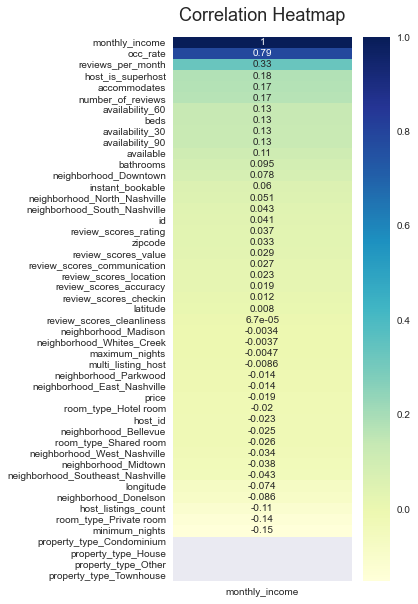

In [80]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(airbnb_data.corr()[['monthly_income']].sort_values(by='monthly_income', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [81]:
X_train = X_train[['number_of_reviews','beds','accommodates','host_is_superhost']]
X_test = X_test[['number_of_reviews','beds','accommodates','host_is_superhost']]

In [82]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [83]:
metrics.r2_score(y_train, y_hat_train)

0.0781260793120826

In [84]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         monthly_income   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     104.0
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           3.58e-85
Time:                        14:49:34   Log-Likelihood:                -41115.
No. Observations:                4915   AIC:                         8.224e+04
Df Residuals:                    4910   BIC:                         8.227e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -20.0312     35.319     -0.567      0.571     -89.273      49.211
number_of_reviews     2.1297      0.191     11.138      0.000       1.755       2.505
beds                 -7.1798      6.537     -1.098      0.272     -19.996       5.636
accommodates         58.5141      6.504      8.997      0.000      45.764      71.265
host_is_superhost   263.2947     31.509      8.356      0.000     201.524     325.066
==============================================================================
Omnibus:                     2493.185   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18534.289
Skew:                           2.325   Prob(JB):                         0.00
Kurtosis:                      11.299   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 1039.2928804982282
RMSE Test: 1111.7464228358785


## Choose Model Features Using Stepwise Selection

In [86]:
y = airbnb_data['monthly_income']
X = airbnb_data.drop(['last_scraped', 'id','host_id','monthly_income','occ_rate'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [88]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(new_x_cols)

<ipython-input-87-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\saman\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Add  property_type_Other            with p-value 5.90812e-275
Add  reviews_per_month              with p-value 3.78427e-128
Add  accommodates                   with p-value 1.60177e-63
Add  availability_30                with p-value 6.16059e-17
Add  host_listings_count            with p-value 5.55184e-11
Add  room_type_Private room         with p-value 9.04038e-09
Add  number_of_reviews              with p-value 1.3832e-07
Add  host_is_superhost              with p-value 7.27146e-09
Add  neighborhood_Downtown          with p-value 0.000890215
Add  minimum_nights                 with p-value 0.00685333
resulting features:
['property_type_Other', 'reviews_per_month', 'accommodates', 'availability_30', 'host_listings_count', 'room_type_Private room', 'number_of_reviews', 'host_is_superhost', 'neighborhood_Downtown', 'minimum_nights']


In [89]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [90]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [91]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.19879395038971825
RMSE Train: 968.8896073875082
RMSE Test: 1055.8605253551723


In [92]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         monthly_income   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     135.2
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          1.90e-228
Time:                        14:50:26   Log-Likelihood:                -40770.
No. Observations:                4915   AIC:                         8.156e+04
Df Residuals:                    4905   BIC:                         8.163e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
property_type_Other     -345.6380     44.575     -7.754      0.000    -433.025    -258.252
reviews_per_month        246.0970     10.766     22.859      0.000     224.991     267.203
accommodates              47.9661      4.296     11.166      0.000      39.545      56.388
availability_30            9.7916      1.227      7.982      0.000       7.387      12.197
host_listings_count       -0.1782      0.044     -4.073      0.000      -0.264      -0.092
room_type_Private room  -257.7202     48.119     -5.356      0.000    -352.055    -163.385
number_of_reviews         -1.3248      0.233     -5.696      0.000      -1.781      -0.869
host_is_superhost        173.1059     30.051      5.760      0.000     114.193     232.019
neighborhood_Downtown    104.7706     33.873      3.093      0.002      38.365     171.177
minimum_nights            -2.4049      0.889     -2.705      0.007      -4.148      -0.662
==============================================================================
Omnibus:                     2652.037   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25556.453
Skew:                           2.408   Prob(JB):                         0.00
Kurtosis:                      13.080   Cond. No.                     1.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We cannot confidently predict the price of an airbnb with the given data.

# Regression on Average Home Value

In [93]:
regression_df = pd.read_csv("cleaned_data/model_data_clean.csv", index_col=0)

In [94]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 2015-06-01 to 2021-02-01
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39 non-null     float64
 1   host_id                           39 non-null     float64
 2   host_listings_count               39 non-null     float64
 3   zipcode                           39 non-null     float64
 4   latitude                          39 non-null     float64
 5   longitude                         39 non-null     float64
 6   accommodates                      39 non-null     float64
 7   bathrooms                         39 non-null     float64
 8   beds                              39 non-null     float64
 9   price                             39 non-null     float64
 10  minimum_nights                    39 non-null     float64
 11  maximum_nights                    39 non-null     float64
 12

In [95]:
regression_df.head()

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,avg_home_value
2015-06-01,4.911123e+06,1.847859e+07,2.355372,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,163.115702,...,8.0,3.0,1.0,78.0,11.0,1.0,0.0,39.0,3.0,194391.913462
2015-07-01,4.585624e+06,1.588542e+07,10.465015,37202.203096,36.157222,-86.767316,4.607430,1.500310,2.308978,202.349226,...,117.0,9.0,33.0,1048.0,100.0,18.0,0.0,451.0,18.0,195615.557692
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196760.903846
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198188.798077
2015-10-01,5.435875e+06,1.857827e+07,11.842180,37201.418483,36.156564,-86.767390,4.795735,1.528910,2.406161,200.524171,...,150.0,23.0,54.0,1360.0,130.0,51.0,0.0,566.0,30.0,199658.365385


In [96]:
regression_df.tail()

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,avg_home_value
2020-10-01,2.947930e+07,1.089430e+08,44.070025,37202.054170,36.161081,-86.769555,6.279273,1.912799,3.715442,212.609249,...,324.0,49.0,0.0,0.0,6055.0,0.0,73.0,681.0,16.0,288751.259615
2020-11-01,2.973666e+07,1.117253e+08,44.364508,37202.339950,36.160847,-86.770116,6.231287,1.907149,3.692683,211.482086,...,324.0,49.0,0.0,0.0,5945.0,0.0,74.0,652.0,18.0,291187.711538
2020-12-01,3.052512e+07,1.180080e+08,45.724200,37202.158459,36.160308,-86.769276,6.198440,1.906143,3.645701,212.335529,...,334.0,47.0,0.0,0.0,6153.0,0.0,73.0,650.0,16.0,293967.509615
2021-01-01,3.076685e+07,1.191460e+08,47.797448,37201.979548,36.160198,-86.769105,6.201080,1.907723,3.649215,225.319863,...,330.0,47.0,0.0,0.0,6112.0,0.0,76.0,647.0,17.0,296722.163462
2021-02-01,3.122308e+07,1.220661e+08,101.710612,37202.113444,36.160366,-86.768799,6.230794,1.921143,3.665365,233.017741,...,338.0,48.0,0.0,0.0,6144.0,0.0,66.0,659.0,18.0,299383.230769


In [97]:
regression_df.dropna(inplace=True)

In [98]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 2015-06-01 to 2021-02-01
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39 non-null     float64
 1   host_id                           39 non-null     float64
 2   host_listings_count               39 non-null     float64
 3   zipcode                           39 non-null     float64
 4   latitude                          39 non-null     float64
 5   longitude                         39 non-null     float64
 6   accommodates                      39 non-null     float64
 7   bathrooms                         39 non-null     float64
 8   beds                              39 non-null     float64
 9   price                             39 non-null     float64
 10  minimum_nights                    39 non-null     float64
 11  maximum_nights                    39 non-null     float64
 12

## Run Baseline Model

In [99]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)

In [100]:
# y = regression_df['total_average']
# X = regression_df['inventory']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [102]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [103]:
metrics.r2_score(y_train, y_hat_train)

1.0

In [104]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 7.166841244199704e-09
RMSE Test: 12847.861492281978


Our model is extremely overfit to the training data.

In [105]:
linreg_summary(X_train,y_train)

C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\saman\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                nan
Time:                        14:51:58   Log-Likelihood:                 492.68
No. Observations:                  31   AIC:                            -923.4
Df Residuals:                       0   BIC:                            -878.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0040        inf          0        nan         nan         nan
host_listings_count                128.3966        inf          0        nan         nan         nan
zipcode                              2.8861        inf          0        nan         nan         nan
latitude                             0.5001        inf          0        nan         nan         nan
longitude                           -0.4652        inf         -0        nan         nan         nan
accommodates                       129.6559        inf          0        nan         nan         nan
bathrooms                           27.4778        inf          0        nan         nan         nan
beds                               132.8083        inf          0        nan         nan         nan
price                              123.7899        inf          0        nan         nan         nan
minimum_nights                      77.2044        inf          0        nan         nan         nan
maximum_nights                      -0.0156        inf         -0        nan         nan         nan
availability_30                   -143.3764        inf         -0        nan         nan         nan
availability_60                   -805.1282        inf         -0        nan         nan         nan
availability_90                    517.2137        inf          0        nan         nan         nan
number_of_reviews                 2397.1518        inf          0        nan         nan         nan
review_scores_rating               251.1490        inf          0        nan         nan         nan
review_scores_accuracy              23.7910        inf          0        nan         nan         nan
review_scores_cleanliness           25.5245        inf          0        nan         nan         nan
review_scores_checkin               24.6519        inf          0        nan         nan         nan
review_scores_communication          7.1819        inf          0        nan         nan         nan
review_scores_location              15.6568        inf          0        nan         nan         nan
review_scores_value                 35.1032        inf          0        nan         nan         nan
reviews_per_month                 -148.0496        inf         -0        nan         nan         nan
occ_rate                            76.1232        inf          0        nan         nan         nan
monthly_income                      -0.0367        inf         -0        nan         nan         nan
inventory                          308.3914        inf          0        nan         nan         nan
host_is_superhost                   -1.6841        inf         -0        nan         nan         nan
multi_listing_host                 -35.6013        in

Using this many features has severely overfit our data. We have more variables than datapoints.

## Run Model Using Only Most Correlated Features

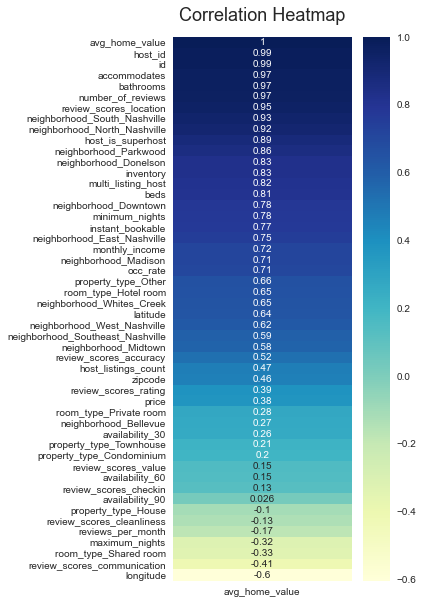

In [106]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr()[['avg_home_value']].sort_values(by='avg_home_value', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [107]:
X_train = X_train[['bathrooms','accommodates','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville',
                   'neighborhood_South_Nashville','review_scores_location']]
X_test = X_test[['bathrooms','accommodates','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville',
                   'neighborhood_South_Nashville','review_scores_location']]

In [108]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [109]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.991770375171401
RMSE Train: 2432.04817782506
RMSE Test: 2835.656798669994


Our RMSE Test and Train scores have moved much closer together, and our R2 is still extremely high.

In [111]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     396.0
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.00e-22
Time:                        14:52:58   Log-Likelihood:                -285.68
No. Observations:                  31   AIC:                             587.4
Df Residuals:                      23   BIC:                             598.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -7.861e+05   4.06e+05     -1.937      0.065   -1.63e+06    5.36e+04
bathrooms                     6.665e+04   2.72e+04      2.451      0.022    1.04e+04    1.23e+05
accommodates                  3916.9979    1.2e+04      0.326      0.747   -2.09e+04    2.88e+04
number_of_reviews             1296.8377    441.132      2.940      0.007     384.286    2209.389
host_is_superhost              -21.1856      4.305     -4.921      0.000     -30.092     -12.280
neighborhood_North_Nashville    65.4993     23.719      2.761      0.011      16.432     114.566
neighborhood_South_Nashville    28.8309     29.698      0.971      0.342     -32.604      90.266
review_scores_location        8.794e+04   4.35e+04      2.023      0.055   -1980.340    1.78e+05
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.340
Skew:                          -0.169   Prob(JB):                        0.844
Kurtosis:                       2.615   Cond. No.                     2.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are some features in this model with p-values above 0.05. Let's try using stepwise selection to select our features based on p-values instead.

## Choose Model Features Using Stepwise Selection

In [112]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [113]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(new_x_cols)

<ipython-input-87-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  beds                           with p-value 2.2177e-22
Add  review_scores_accuracy         with p-value 0.00020591
Add  minimum_nights                 with p-value 5.5183e-07
Add  neighborhood_Donelson          with p-value 6.12797e-06
resulting features:
['beds', 'review_scores_accuracy', 'minimum_nights', 'neighborhood_Donelson']


In [114]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [115]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [116]:
metrics.r2_score(y_train, y_hat_train)

0.9961256084241629

In [117]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.9961256084241629
RMSE Train: 1668.72169104561
RMSE Test: 27431.589461754615


Our test RMSE increased significantly. This may not be the best way to select our features.

In [118]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1671.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           6.18e-31
Time:                        14:53:11   Log-Likelihood:                -274.00
No. Observations:                  31   AIC:                             558.0
Df Residuals:                      26   BIC:                             565.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.786e+06   2.18e+05     -8.209      0.000   -2.23e+06   -1.34e+06
beds                    4.089e+04   1976.816     20.686      0.000    3.68e+04     4.5e+04
review_scores_accuracy  1.921e+05   2.22e+04      8.650      0.000    1.46e+05    2.38e+05
minimum_nights          3571.7117    338.898     10.539      0.000    2875.098    4268.326
neighborhood_Donelson     35.5113      6.287      5.648      0.000      22.588      48.434
==============================================================================
Omnibus:                        0.877   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.712
Skew:                          -0.353   Prob(JB):                        0.701
Kurtosis:                       2.771   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Run Simple Regression Model Using Number of Reviews

In [119]:
y = regression_df['avg_home_value']
X = regression_df[['number_of_reviews']]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [121]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [122]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.9408612156324989
RMSE Train: 6519.560981094953
RMSE Test: 6557.823148901785


In [123]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     461.4
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.35e-19
Time:                        14:53:22   Log-Likelihood:                -316.25
No. Observations:                  31   AIC:                             636.5
Df Residuals:                      29   BIC:                             639.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.58e+05   4934.671     32.010      0.000    1.48e+05    1.68e+05
number_of_reviews  2297.4342    106.959     21.480      0.000    2078.678    2516.190
==============================================================================
Omnibus:                        4.935   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.830
Skew:                           0.856   Prob(JB):                        0.147
Kurtosis:                       3.191   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

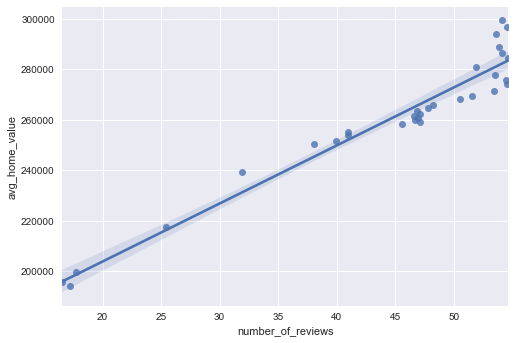

In [124]:
sns.regplot(X_train,y_train)

Using only the number of reviews, we were able to predict the average home value with 94% accuracy within $6500. Our test RMSE is also very close to our train RMSE, meaning our model is not overfit.

However, the first model we ran with the top correlated features performed strongest. We will remove the features with p-values above 0.05 and check our results.

## Run Model with Significant features from Model 2

In [125]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [126]:
X_train = X_train[['bathrooms','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville']]
X_test = X_test[['bathrooms','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville']]

In [127]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [128]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.9899754697098497
RMSE Train: 2684.1956706591122
RMSE Test: 2991.0656250972306


In [129]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     641.9
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.43e-25
Time:                        14:55:17   Log-Likelihood:                -288.74
No. Observations:                  31   AIC:                             587.5
Df Residuals:                      26   BIC:                             594.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         6569.8957   1.65e+04      0.397      0.694   -2.74e+04    4.06e+04
bathrooms                     1.129e+05   1.38e+04      8.198      0.000    8.46e+04    1.41e+05
number_of_reviews             1343.5731    349.365      3.846      0.001     625.442    2061.704
host_is_superhost              -15.2259      2.832     -5.376      0.000     -21.048      -9.404
neighborhood_North_Nashville    75.1344     19.492      3.855      0.001      35.067     115.201
==============================================================================
Omnibus:                        1.869   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.605
Skew:                          -0.425   Prob(JB):                        0.448
Kurtosis:                       2.278   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are able to obtain our best RMSE scores from running the model with these features.

In [130]:
feature_cols = ['bathrooms','number_of_reviews',
                'host_is_superhost','neighborhood_North_Nashville']

In [131]:
y = regression_df['avg_home_value']
X = regression_df[feature_cols]
final_reg_features_df = pd.concat([y,X], axis=1)

In [132]:
final_reg_features_df

,avg_home_value,bathrooms,number_of_reviews,host_is_superhost,neighborhood_North_Nashville
2015-06-01,194391.913462,1.450413,17.206612,23,6.0
2015-07-01,195615.557692,1.500310,16.536223,285,49.0
2015-10-01,199658.365385,1.528910,17.715640,434,76.0
2016-09-01,217725.894231,1.573390,25.443699,974,176.0
2017-09-01,239449.740385,1.650038,31.943173,1961,454.0
2018-04-01,250327.384615,1.689675,38.099596,2376,484.0
2018-05-01,251465.682692,1.684571,39.961143,2379,494.0
2018-07-01,253835.615385,1.705656,40.941241,2666,511.0
2018-08-01,255036.875000,1.703250,40.988182,2738,540.0
2018-09-01,256133.490385,1.696141,42.363731,2718,523.0


In [133]:
final_reg_features_df.to_csv("cleaned_data/final_reg_features.csv")

# STOP HERE

## Explore Multicollinearity, then perform Stepwise Selection

In [134]:
X = X[new_x_cols]

KeyError: "None of [Index(['beds', 'review_scores_accuracy', 'minimum_nights',\n       'neighborhood_Donelson'],\n      dtype='object')] are in the [columns]"

In [60]:
#X = regression_df.drop(['host_id','avg_home_value'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('beds', 133.20818545593443),
 ('occ_rate', 67.45445771862147),
 ('review_scores_rating', 56.50696138604927)]

In [61]:
vif_scores = list(zip(X.columns, vif))
multi_co_cols = [x for x,vif in vif_scores if vif > 10]
multi_co_cols

['beds', 'occ_rate', 'review_scores_rating']

In [36]:
import statsmodels.formula.api as smf
simple_reg_model = smf.ols(formula='total_average ~ inventory', data=regression_df).fit()

In [37]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

Intercept    243935.058927
inventory        16.056183
dtype: float64


,0,1
Intercept,219720.485007,268149.632848
inventory,12.150981,19.961384


p-values: 
Intercept    9.886676e-22
inventory    5.191057e-10
dtype: float64
r-squared: 0.6522554516824053


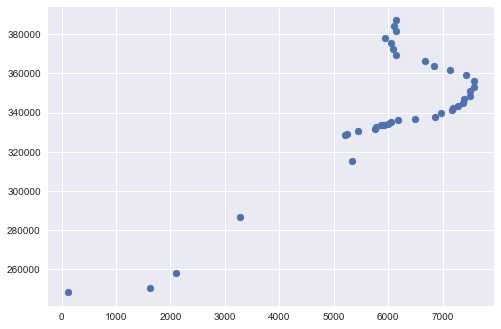

In [44]:
plt.scatter(X,y)

In [28]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [29]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=False)
print('resulting features:')
print(new_x_cols)

<ipython-input-28-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['beds']


In [135]:
df_pairs=regression_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. 
df_pairs.drop_duplicates(inplace=True)

In [137]:
df_pairs[(df_pairs.cc>.95) & (df_pairs.cc <1)]

,cc
pairs,
"(host_id, id)",0.997730
"(multi_listing_host, inventory)",0.992360
"(instant_bookable, multi_listing_host)",0.991704
"(property_type_Townhouse, property_type_Condominium)",0.991316
"(occ_rate, monthly_income)",0.988711
"(host_id, avg_home_value)",0.987136
"(inventory, neighborhood_East_Nashville)",0.985115
"(avg_home_value, id)",0.985107
"(bathrooms, id)",0.984839


In [34]:
#X = regression_df.drop(['total_average'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('zipcode', 715259843.1212648),
 ('latitude', 5457073078.292448),
 ('longitude', 6564502079.45954),
 ('accommodates', 22771.63979053534),
 ('bathrooms', 10842.413959299245),
 ('bedrooms', 5500.522294833365),
 ('beds', 8880.791590580611),
 ('price', 985.9804349733819),
 ('guests_included', 2423.499957960968),
 ('minimum_nights', 68.88862950081703),
 ('maximum_nights', 2.143976185425021),
 ('number_of_reviews', 1559.0167982996509),
 ('inventory', 554.9645190228075)]

## total_average vs. number of reviews

In [45]:
y = regression_df['total_average']
X = regression_df['number_of_reviews']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [50]:
simple_reg_model = smf.ols(formula='total_average ~ number_of_reviews', data=regression_df).fit()

In [51]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 


Intercept            206414.964047
number_of_reviews      2914.870325
dtype: float64


,0,1
Intercept,191325.628949,221504.299144
number_of_reviews,2593.997965,3235.742685


In [52]:
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

p-values: 
Intercept            2.380020e-26
number_of_reviews    3.246172e-20
dtype: float64
r-squared: 0.9015417083368342


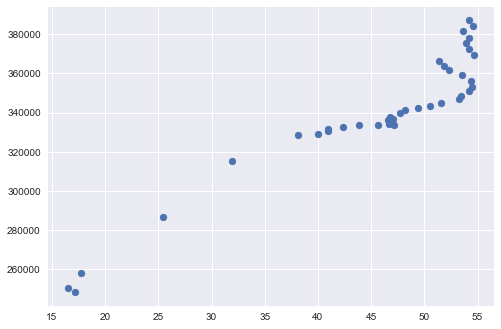

In [53]:
plt.scatter(X,y)

In [54]:
simple_reg_model = smf.ols(formula='total_average ~ accommodates', data=regression_df).fit()

In [55]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 


Intercept      -56454.606231
accommodates    67922.084958
dtype: float64


,0,1
Intercept,-89575.110571,-23334.101891
accommodates,62265.675887,73578.494030


In [56]:
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

p-values: 
Intercept       1.401787e-03
accommodates    2.314294e-24
dtype: float64
r-squared: 0.9411739313529919


### Correlation Heatmap

In [65]:
np.triu(np.ones_like(regression_df.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

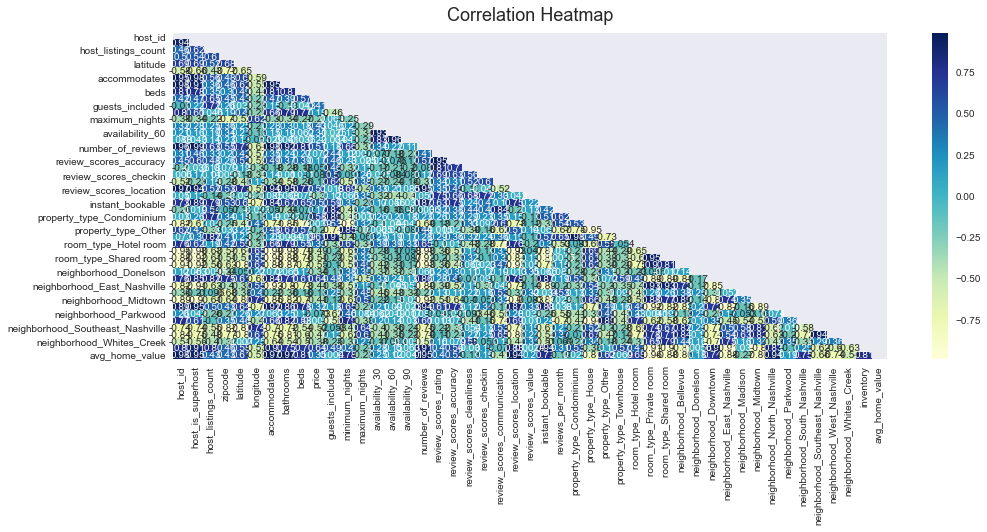

In [70]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr(), mask=mask, cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
regression_df.corr()[['total_average']].sort_values(by='total_average', ascending=False)

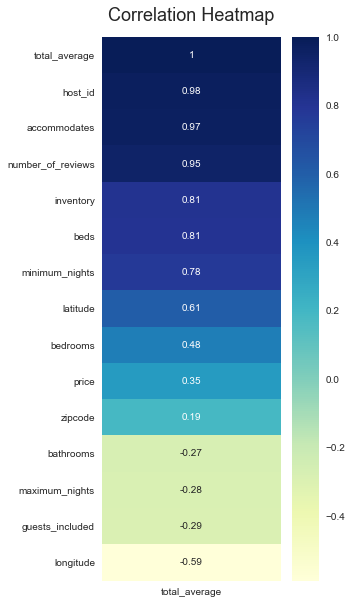

In [72]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr()[['total_average']].sort_values(by='total_average', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Simple Linear Regression

#### Pairplots

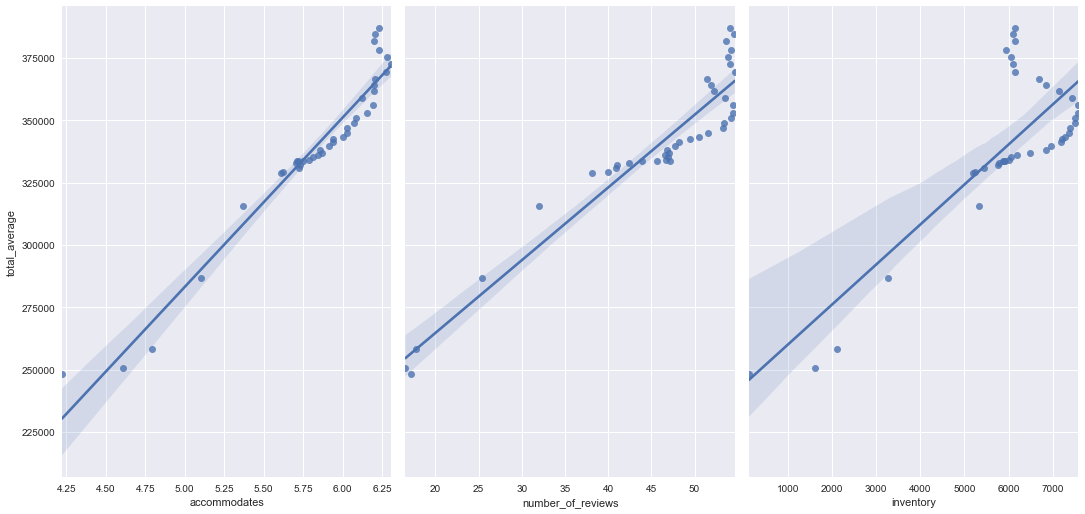

In [76]:
sns.pairplot(regression_df, x_vars=['accommodates','number_of_reviews','inventory'], 
             y_vars='total_average', height=7, aspect=0.7, kind='reg');

The relationship does not appear to be linear. There are also very limited number of datapoints under $300k.


#### Inventory

In [71]:
def run_ols_model(outcome, predictors):
    formula = outcome+'~'+predictors
    model = ols(formula=formula, data=regression_df).fit()
    return model.summary()

In [72]:
outcome = 'avg_home_value'
predictors = 'inventory'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     69.68
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.94e-10
Time:                        10:51:25   Log-Likelihood:                -439.58
No. Observations:                  39   AIC:                             883.2
Df Residuals:                      37   BIC:                             886.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.438e+05   1.19e+04     20.424      0.000     2.2e+05    2.68e+05
inventory     16.0744      1.926      8.348      0.000      12.173      19.976
==============================================================================
Omnibus:                        8.833   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.822
Skew:                           1.164   Prob(JB):                       0.0121
Kurtosis:                       3.072   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Number of Reviews

In [73]:
outcome = 'avg_home_value'
predictors = 'number_of_reviews'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     336.0
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.72e-20
Time:                        10:51:27   Log-Likelihood:                -415.17
No. Observations:                  39   AIC:                             834.3
Df Residuals:                      37   BIC:                             837.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.065e+05   7474.892     27.621      0.000    1.91e+05    2.22e+05
number_of_reviews  2913.4966    158.940     18.331      0.000    2591.454    3235.539
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.687
Skew:                           0.499   Prob(JB):                        0.261
Kurtosis:                       2.190   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Accommodates

In [74]:
outcome = 'avg_home_value'
predictors = 'accommodates'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     590.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.45e-24
Time:                        10:51:28   Log-Likelihood:                -405.04
No. Observations:                  39   AIC:                             814.1
Df Residuals:                      37   BIC:                             817.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.669e+04   1.64e+04     -3.461      0.001   -8.99e+04   -2.35e+04
accommodates  6.797e+04   2798.136     24.292      0.000    6.23e+04    7.36e+04
==============================================================================
Omnibus:                       11.548   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.239
Skew:                           1.245   Prob(JB):                      0.00363
Kurtosis:                       3.848   Cond. No.                         76.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Linear Regression

#### All three

In [75]:
outcome = 'avg_home_value'
x_cols = ['number_of_reviews','accommodates', 'inventory']
predictors = '+'.join(x_cols)
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     351.7
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.48e-26
Time:                        10:52:08   Log-Likelihood:                -393.17
No. Observations:                  39   AIC:                             794.3
Df Residuals:                      35   BIC:                             801.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.161e+04   3.78e+04     -1.895      0.066   -1.48e+05    5096.070
number_of_reviews  1000.6406    443.795      2.255      0.031      99.689    1901.592
accommodates       7.077e+04   9650.959      7.333      0.000    5.12e+04    9.04e+04
inventory            -7.9069      1.466     -5.393      0.000     -10.883      -4.931
==============================================================================
Omnibus:                        7.266   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.913
Skew:                           0.828   Prob(JB):                       0.0520
Kurtosis:                       3.946   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### All Predictors

#### Feature Importance Graph

#### Stepwise Selection

In [ ]:
#